In [1]:
pip install graphviz


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

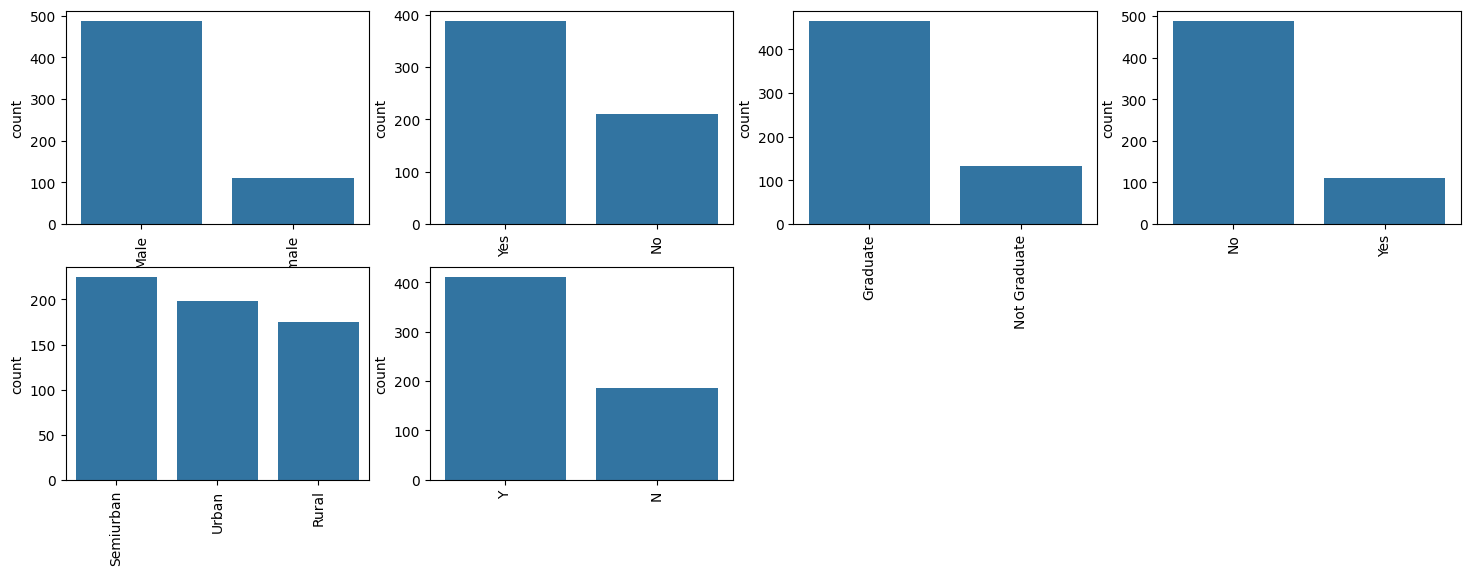

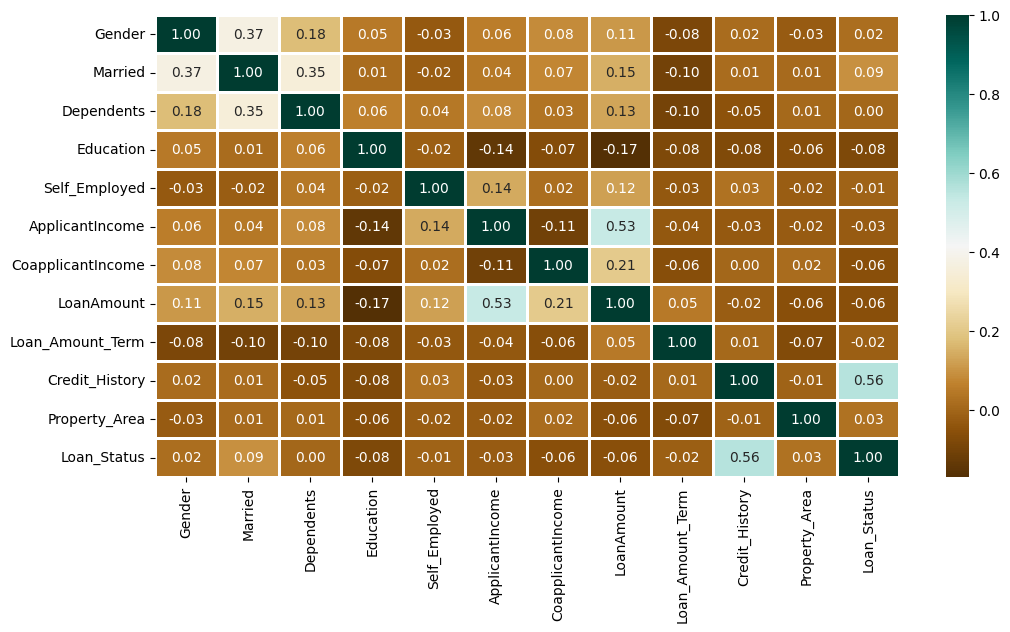

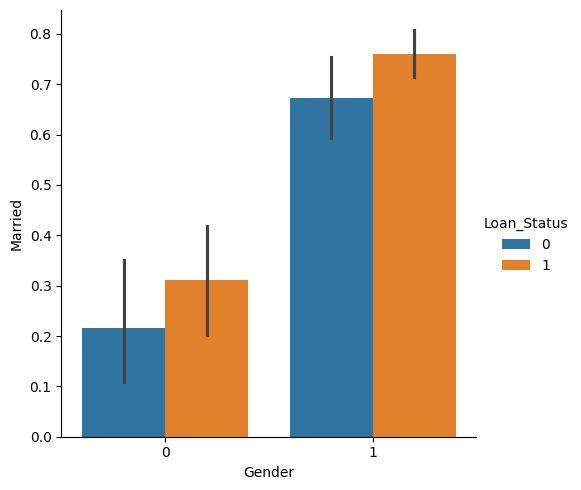

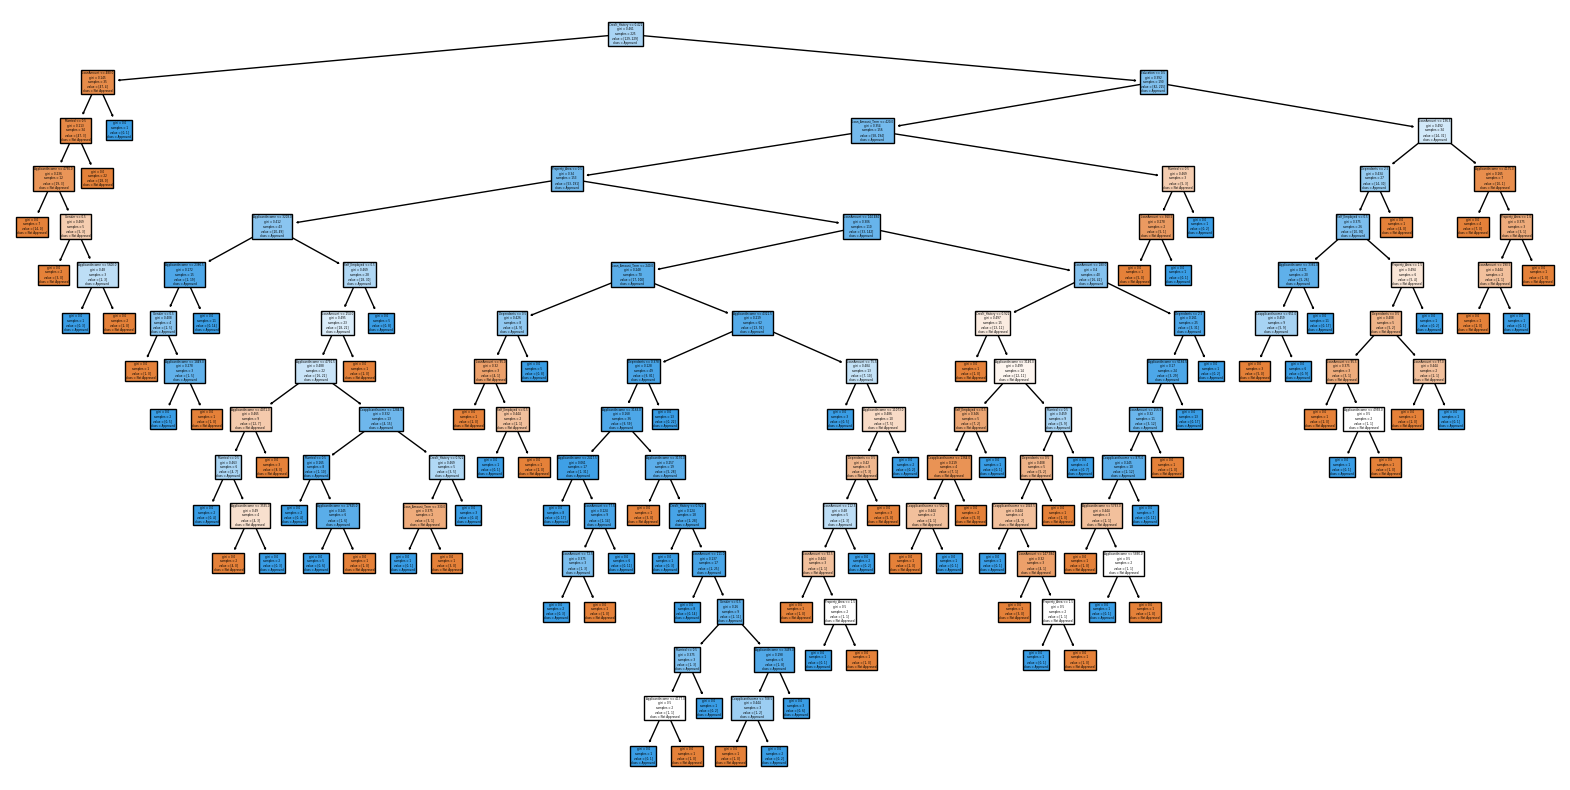

Training accuracy score of Random Forest Classifier: 100.0
Testing accuracy score of Random Forest Classifier: 80.41666666666667


RandomForestClassifier(random_state=42)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

print(data.head(5))

# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

sns.catplot(x="Gender", y="Married",
			hue="Loan_Status",
			kind="bar",
			data=data)

for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.4,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree


# Read data
data = pd.read_csv("LoanApprovalPrediction.csv")

# Drop 'Loan_ID' column
data.drop(['Loan_ID'], axis=1, inplace=True)

# Encode categorical variables
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = data[col].astype('category').cat.codes

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Split data into features and target variable
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest Classifier
rfc.fit(X_train, Y_train)

plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0],
          feature_names=X_train.columns,
          class_names=['Not Approved', 'Approved'],
          filled=True)
plt.show()
# Make predictions on the training set
Y_train_pred = rfc.predict(X_train)
train_accuracy = metrics.accuracy_score(Y_train, Y_train_pred)
print("Training accuracy score of Random Forest Classifier:", 100 * train_accuracy)

# Make predictions on the testing set
Y_test_pred = rfc.predict(X_test)
test_accuracy = metrics.accuracy_score(Y_test, Y_test_pred)
print("Testing accuracy score of Random Forest Classifier:", 100 * test_accuracy)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)




Accuracy score on training set: 68.71508379888269
Accuracy score on testing set: 69.16666666666667


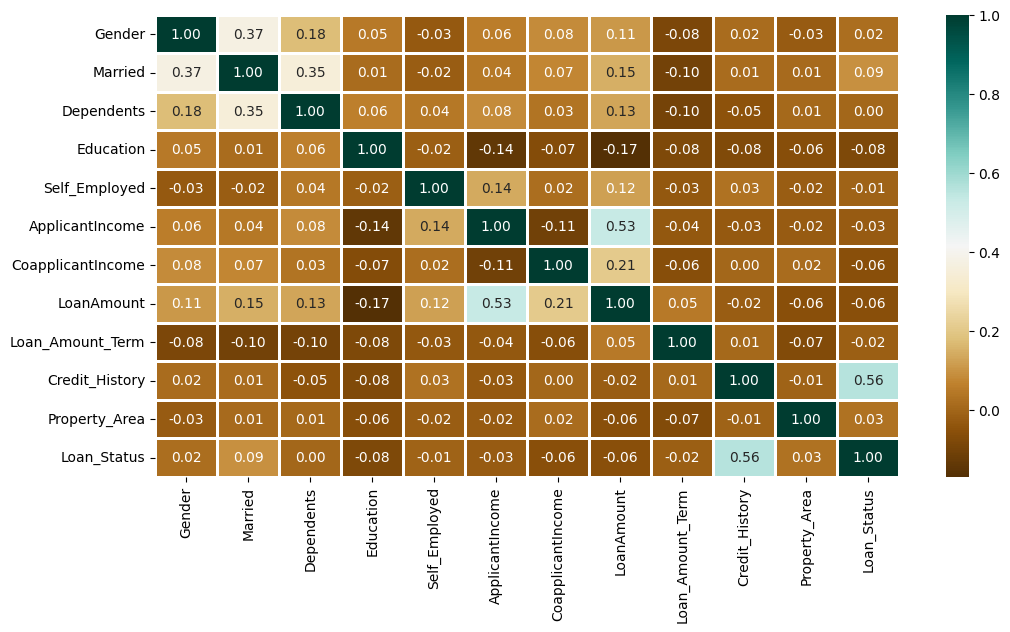

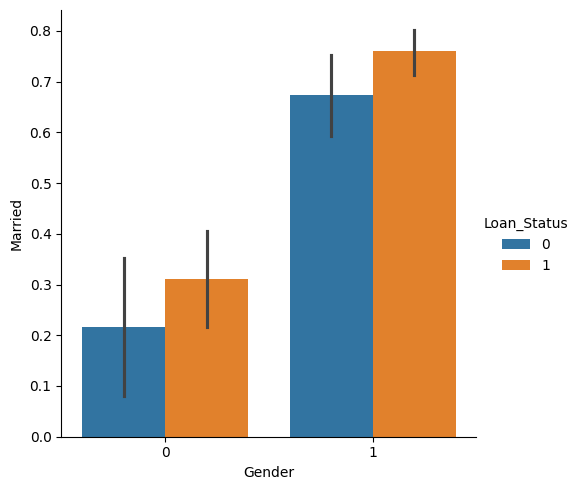

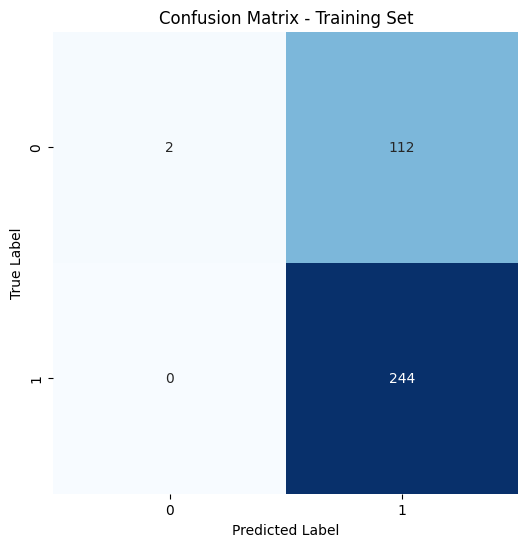

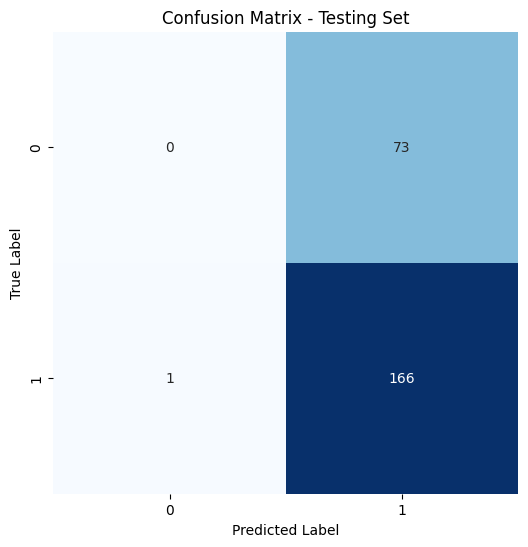

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics

# Read the dataset
data = pd.read_csv("LoanApprovalPrediction.csv")

# Dropping Loan_ID column
data.drop(['Loan_ID'], axis=1, inplace=True)

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
obj_cols = data.select_dtypes(include='object').columns
for col in obj_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Visualize correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

# Visualize categorical variables
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=data)

# Fill missing values with mean
data.fillna(data.mean(), inplace=True)

# Splitting the data into features (X) and target (Y)
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

# Initialize and train the Support Vector Classifier model
svc = SVC()
svc.fit(X_train, Y_train)

# making predictions on the training set
Y_train_pred = svc.predict(X_train)
print("Accuracy score on training set:", 100 * metrics.accuracy_score(Y_train, Y_train_pred))

# making predictions on the testing set
Y_test_pred = svc.predict(X_test)
print("Accuracy score on testing set:", 100 * metrics.accuracy_score(Y_test, Y_test_pred))

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for training set
train_cm = confusion_matrix(Y_train, Y_train_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for testing set
test_cm = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
